In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_8004\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('lynx.csv')
df.head()

,rownames,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475


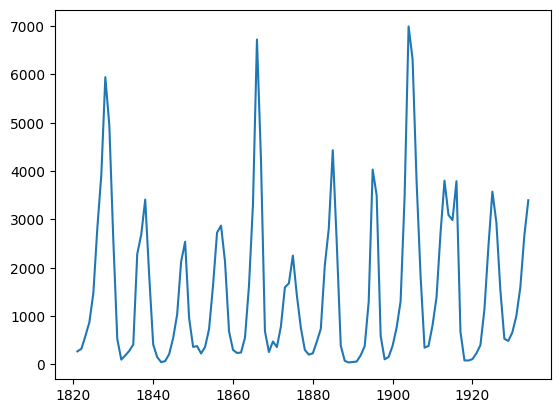

In [12]:
# print(df)
plt.plot(df['time'], df['value'])

In [7]:
# import ljunbox test
from statsmodels.stats.diagnostic import acorr_ljungbox

In [9]:
acorr_ljungbox(df['value'])

,lb_stat,lb_pvalue
1,59.129207,1.476513e-14
2,64.557219,9.584687e-15
3,68.791500,7.744691e-15
4,91.383092,6.693478e-19
5,121.983004,1.192975e-24
6,141.608374,4.586549e-28
7,144.314902,6.333449e-28
8,150.263618,1.727602e-28
9,181.863792,2.067731e-34
10,215.445210,9.593084e-41


In [10]:
from statsmodels.tsa.stattools import adfuller, kpss

In [11]:
adfuller(df['value'])

(-2.996303675142559,
 0.03524103535901367,
 7,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 1635.975223662428)

In [14]:
kpss(df['value'])

C:\Users\user\AppData\Local\Temp\ipykernel_8004\2030459894.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(df['value'])


(0.0701467067231069,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [15]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [17]:
np.random.seed(101)
arparams = np.array([.75, -.25])
maparams = np.array([0,0])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
print(ar)
print(ma)

[ 1.   -0.75  0.25]
[1 0 0]


<Axes: >

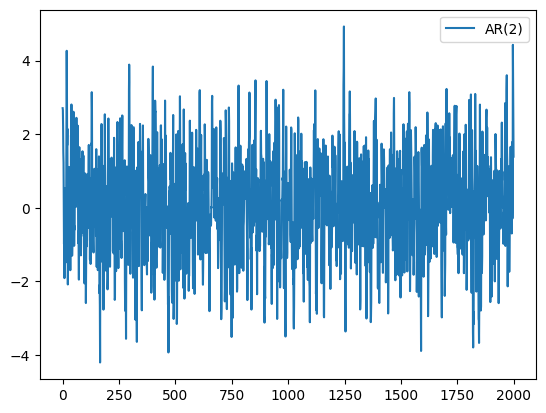

In [18]:
y = arma_generate_sample(ar, ma, 2000)
df = pd.DataFrame(y, columns=['AR(2)'])
df.plot()

In [20]:
# import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

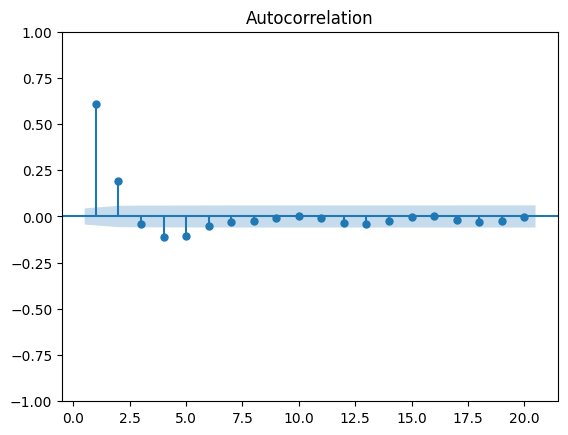

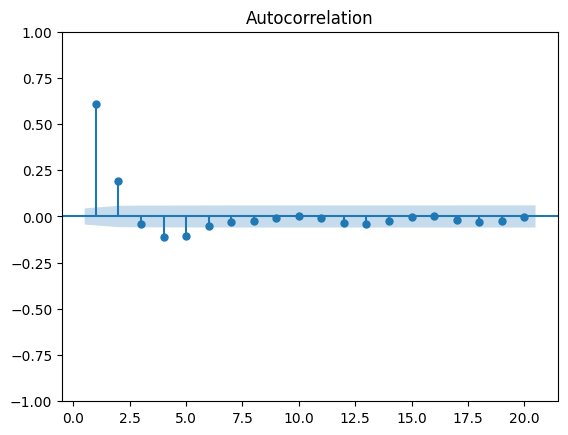

In [22]:
plot_acf(df['AR(2)'], lags=20, zero=False)

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model1 = ARIMA(df, order=(1,0,0)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  AR(2)   No. Observations:                 2000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2993.660
Date:                Thu, 04 Apr 2024   AIC                           5993.320
Time:                        10:18:23   BIC                           6010.122
Sample:                             0   HQIC                          5999.489
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0777      0.061      1.266      0.206      -0.043       0.198
ar.L1          0.6071      0.017     34.703      0.000       0.573       0.641
sigma2         1.1683      0.037     31.523      0.000       1.096       1.241
===================================================================================
Ljung-Box (L1) (Q):                  55.23   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.00   Prob(JB):                         0.94
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model2 = ARIMA(df, order=(2,0,0)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  AR(2)   No. Observations:                 2000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2914.998
Date:                Thu, 04 Apr 2024   AIC                           5837.997
Time:                        10:35:53   BIC                           5860.400
Sample:                             0   HQIC                          5846.223
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.046      1.624      0.104      -0.016       0.166
ar.L1          0.7737      0.022     35.352      0.000       0.731       0.817
ar.L2         -0.2755      0.022    -12.583      0.000      -0.318      -0.233
sigma2         1.0798      0.034     31.946      0.000       1.014       1.146
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.66   Prob(JB):                         0.90
Heteroskedasticity (H):               0.98   Skew:                             0.01
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model3 = ARIMA(df, order=(3,0,0)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  AR(2)   No. Observations:                 2000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2913.815
Date:                Thu, 04 Apr 2024   AIC                           5837.630
Time:                        10:36:07   BIC                           5865.635
Sample:                             0   HQIC                          5847.913
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0748      0.045      1.673      0.094      -0.013       0.163
ar.L1          0.7642      0.023     33.840      0.000       0.720       0.808
ar.L2         -0.2489      0.028     -8.955      0.000      -0.303      -0.194
ar.L3         -0.0345      0.023     -1.507      0.132      -0.079       0.010
sigma2         1.0786      0.034     31.985      0.000       1.012       1.145
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.95   Prob(JB):                         0.87
Heteroskedasticity (H):               0.98   Skew:                             0.01
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from scipy.stats.distributions import chi2

In [35]:
def LLR_test(n1, n2, DF=1):
    L1 = n1.llf
    L2 = n2.llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [36]:
LLR_test(model1, model2) # model 2 is better than model 1 because p-value is less than 0.05

0.0

In [37]:
LLR_test(model2, model3) # model 2 is better than model 3 because p-value is bigger than 0.05

0.124

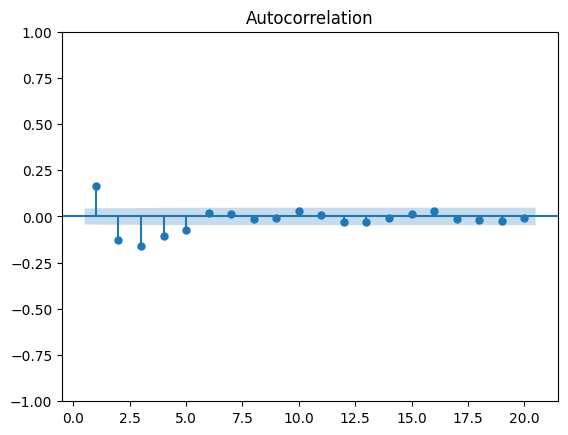

In [45]:
fig = plot_acf(model1.resid, lags=20, zero=False)

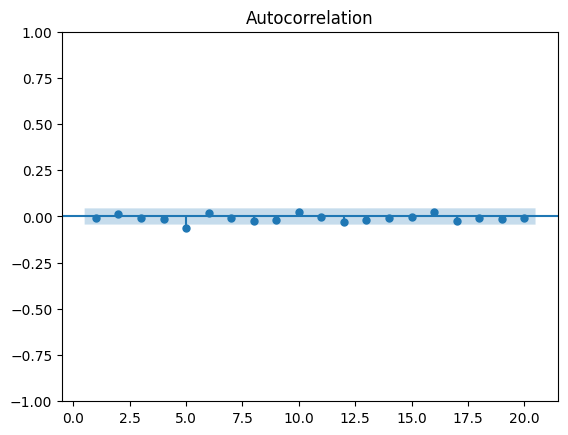

In [46]:
fig = plot_acf(model2.resid, lags=20, zero=False)

In [44]:
acorr_ljungbox(model2.resid, lags=20)

,lb_stat,lb_pvalue
1,0.182694,0.669068
2,0.472377,0.789632
3,0.637995,0.887682
4,0.894642,0.925328
5,8.378816,0.136557
6,8.902763,0.179121
7,9.118026,0.244293
8,10.182563,0.252446
9,10.859893,0.285435
10,11.889056,0.292550


There shouldnt be correlations in the residuals if model has to be good